In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
features = pd.read_csv("eurovision-songs-audio-features/data/list_features.csv")

In [3]:
features = features.drop(["Unnamed: 0", "type", "id", "uri", "track_href", "analysis_url"], axis="columns")

In [4]:
eurovision_with_uris = pd.read_csv("eurovision-songs-audio-features/data/eurovision_with_uris.csv")

In [5]:
eurovision_with_uris = eurovision_with_uris.drop(["Unnamed: 0", "R/O"], axis="columns")

In [6]:
merged_table = pd.concat([eurovision_with_uris, features], axis=1)

In [7]:
merged_table.to_csv("data/merged_table.csv")

In [8]:
merged_table

,Year,Host_City,Country,Contestant,Song,Points,Place,uri,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,2019,Tel-Aviv,Malta,Michela,Chameleon,107,14th,51FonRnKwkcXS6e0qwpEeY,0.714,0.696,...,-3.720,0.0,0.0728,0.2780,0.000000,0.1750,0.853,98.046,180920.0,4.0
1,2019,Tel-Aviv,Albania,Jonida Maliqi,Ktheju tokës,90,17th,7p83db7oriaCul8WzoLr6f,0.531,0.611,...,-5.119,1.0,0.0387,0.0162,0.000000,0.1100,0.597,115.058,194452.0,4.0
2,2019,Tel-Aviv,Czech Republic,Lake Malawi,Friend of a Friend,157,11th,2U7Zc6NrWQgUWdBAIFrzdI,0.702,0.739,...,-4.891,0.0,0.0588,0.2690,0.000002,0.0728,0.410,105.983,172642.0,4.0
3,2019,Tel-Aviv,Germany,S!sters,Sister,24,25th,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,Tel-Aviv,Russia,Sergey Lazarev,Scream,370,3rd,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,1956,Lugano,Belgium,Mony Marc,Le Plus Beau Jour De Ma Vie,—,2nd,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1318,1956,Lugano,Germany,Freddy Quinn,So Geht Das Jede Nacht,—,2nd,2dnXvk1xxHNOPV59JhdR5D,0.664,0.746,...,-5.375,1.0,0.0672,0.6310,0.000000,0.3300,0.905,97.130,126533.0,4.0
1319,1956,Lugano,France,Dany Dauberson,Il Est Là,—,2nd,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1320,1956,Lugano,Luxembourg,Michèle Arnaud,Les Amants De Minuit,—,2nd,4Htfcujp7KxcgEnJeRrAbT,0.387,0.232,...,-9.529,1.0,0.0388,0.9480,0.000000,0.0679,0.154,99.369,157100.0,4.0


In [9]:
data = merged_table.copy()

In [10]:
NAs = data["uri"].apply(lambda x: True if pd.notna(x) else False)
data = data.assign(NAs = NAs)

In [11]:
data

,Year,Host_City,Country,Contestant,Song,Points,Place,uri,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,NAs
0,2019,Tel-Aviv,Malta,Michela,Chameleon,107,14th,51FonRnKwkcXS6e0qwpEeY,0.714,0.696,...,0.0,0.0728,0.2780,0.000000,0.1750,0.853,98.046,180920.0,4.0,True
1,2019,Tel-Aviv,Albania,Jonida Maliqi,Ktheju tokës,90,17th,7p83db7oriaCul8WzoLr6f,0.531,0.611,...,1.0,0.0387,0.0162,0.000000,0.1100,0.597,115.058,194452.0,4.0,True
2,2019,Tel-Aviv,Czech Republic,Lake Malawi,Friend of a Friend,157,11th,2U7Zc6NrWQgUWdBAIFrzdI,0.702,0.739,...,0.0,0.0588,0.2690,0.000002,0.0728,0.410,105.983,172642.0,4.0,True
3,2019,Tel-Aviv,Germany,S!sters,Sister,24,25th,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,2019,Tel-Aviv,Russia,Sergey Lazarev,Scream,370,3rd,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,1956,Lugano,Belgium,Mony Marc,Le Plus Beau Jour De Ma Vie,—,2nd,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1318,1956,Lugano,Germany,Freddy Quinn,So Geht Das Jede Nacht,—,2nd,2dnXvk1xxHNOPV59JhdR5D,0.664,0.746,...,1.0,0.0672,0.6310,0.000000,0.3300,0.905,97.130,126533.0,4.0,True
1319,1956,Lugano,France,Dany Dauberson,Il Est Là,—,2nd,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1320,1956,Lugano,Luxembourg,Michèle Arnaud,Les Amants De Minuit,—,2nd,4Htfcujp7KxcgEnJeRrAbT,0.387,0.232,...,1.0,0.0388,0.9480,0.000000,0.0679,0.154,99.369,157100.0,4.0,True


In [140]:
valid_values = data.groupby("Year").agg({"NAs" : "sum"})
valid_values

,NAs
Year,
1956,6.0
1957,3.0
1958,5.0
1959,2.0
1960,4.0
...,...
2015,15.0
2016,14.0
2017,14.0


In [13]:
total_values = data.groupby("Year").agg({"Country" : "count"})
total_values

,Country
Year,
1956,14
1957,10
1958,10
1959,11
1960,13
...,...
2015,27
2016,26
2017,26


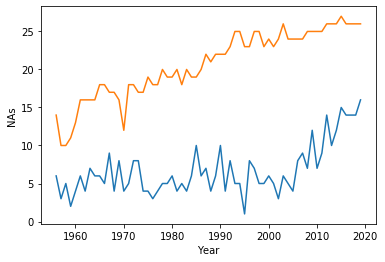

In [14]:
# We wanted to check whether our URI/Feature coverage was biased towards more recent years. The plot shows that, aside 
# an increase in the last decade, we recovered more or less the same number of songs each year from the 50s to the 2000s.
# In fact, when taken as a percentage of the total number of songs per year, our coverage is better for the early 
# eurovision years, where there were fewer songs entering the contest

ax = sns.lineplot("Year", "NAs", data = valid_values.reset_index(drop=False))
ax.plot("Year", "Country", data = total_values.reset_index(drop=False));

In [15]:
cleaned_data = data.loc[data["NAs"]==True, ]

In [16]:
cleaned_data.head()

,Year,Host_City,Country,Contestant,Song,Points,Place,uri,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,NAs
0,2019,Tel-Aviv,Malta,Michela,Chameleon,107,14th,51FonRnKwkcXS6e0qwpEeY,0.714,0.696,...,0.0,0.0728,0.278000,0.000000,0.1750,0.853,98.046,180920.0,4.0,True
1,2019,Tel-Aviv,Albania,Jonida Maliqi,Ktheju tokës,90,17th,7p83db7oriaCul8WzoLr6f,0.531,0.611,...,1.0,0.0387,0.016200,0.000000,0.1100,0.597,115.058,194452.0,4.0,True
2,2019,Tel-Aviv,Czech Republic,Lake Malawi,Friend of a Friend,157,11th,2U7Zc6NrWQgUWdBAIFrzdI,0.702,0.739,...,0.0,0.0588,0.269000,0.000002,0.0728,0.410,105.983,172642.0,4.0,True
5,2019,Tel-Aviv,Denmark,Leonora,Love Is Forever,120,12th,43k9g3vEP8z0qgkoyHjWV3,0.733,0.420,...,1.0,0.0323,0.576000,0.000000,0.0682,0.794,136.030,181013.0,4.0,True
6,2019,Tel-Aviv,San Marino,Serhat,Say Na Na Na,77,19th,1QiX3OmiJ3AyClandLJoEj,0.676,0.922,...,0.0,0.0763,0.000571,0.000153,0.3610,0.742,118.032,178930.0,4.0,True


In [17]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431 entries, 0 to 1321
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              431 non-null    int64  
 1   Host_City         431 non-null    object 
 2   Country           431 non-null    object 
 3   Contestant        431 non-null    object 
 4   Song              431 non-null    object 
 5   Points            431 non-null    object 
 6   Place             431 non-null    object 
 7   uri               431 non-null    object 
 8   danceability      431 non-null    float64
 9   energy            431 non-null    float64
 10  key               431 non-null    float64
 11  loudness          431 non-null    float64
 12  mode              431 non-null    float64
 13  speechiness       431 non-null    float64
 14  acousticness      431 non-null    float64
 15  instrumentalness  431 non-null    float64
 16  liveness          431 non-null    float64
 

In [32]:
cleaned_data = cleaned_data.assign(Place = cleaned_data["Place"].str.rstrip("srtndh"))

In [34]:
cleaned_data = cleaned_data.assign(Place = pd.to_numeric(cleaned_data["Place"]))

In [36]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431 entries, 0 to 1321
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              431 non-null    int64  
 1   Host_City         431 non-null    object 
 2   Country           431 non-null    object 
 3   Contestant        431 non-null    object 
 4   Song              431 non-null    object 
 5   Points            431 non-null    object 
 6   Place             431 non-null    int64  
 7   uri               431 non-null    object 
 8   danceability      431 non-null    float64
 9   energy            431 non-null    float64
 10  key               431 non-null    float64
 11  loudness          431 non-null    float64
 12  mode              431 non-null    float64
 13  speechiness       431 non-null    float64
 14  acousticness      431 non-null    float64
 15  instrumentalness  431 non-null    float64
 16  liveness          431 non-null    float64
 

In [60]:
# For the feature analysis, we decided to normalize the songs' placement in the competition, to account for the fact that
# the total number of participants was different each year. That is to say, coming in 10th place in the first years
# would have meant a terrible defeat, but in the recent year it's a decent result.
# Therefore, we divided the place by the total number of songs for that year to have a scale of 0 to 1, where 0 is last 
# place and 1 is first.

songs_per_year = data.groupby("Year").agg({"Song":"count"}).reset_index(drop=False)
songs_per_year

,Year,Song
0,1956,14
1,1957,10
2,1958,10
3,1959,11
4,1960,13
...,...,...
59,2015,27
60,2016,26
61,2017,26
62,2018,26


In [61]:
years_dict={}
for i in range(len(songs_per_year["Year"])):
    years_dict[songs_per_year.loc[i, "Year"]] = songs_per_year.loc[i, "Song"]

In [62]:
years_dict

{1956: 14,
 1957: 10,
 1958: 10,
 1959: 11,
 1960: 13,
 1961: 16,
 1962: 16,
 1963: 16,
 1964: 16,
 1965: 18,
 1966: 18,
 1967: 17,
 1968: 17,
 1969: 16,
 1970: 12,
 1971: 18,
 1972: 18,
 1973: 17,
 1974: 17,
 1975: 19,
 1976: 18,
 1977: 18,
 1978: 20,
 1979: 19,
 1980: 19,
 1981: 20,
 1982: 18,
 1983: 20,
 1984: 19,
 1985: 19,
 1986: 20,
 1987: 22,
 1988: 21,
 1989: 22,
 1990: 22,
 1991: 22,
 1992: 23,
 1993: 25,
 1994: 25,
 1995: 23,
 1996: 23,
 1997: 25,
 1998: 25,
 1999: 23,
 2000: 24,
 2001: 23,
 2002: 24,
 2003: 26,
 2004: 24,
 2005: 24,
 2006: 24,
 2007: 24,
 2008: 25,
 2009: 25,
 2010: 25,
 2011: 25,
 2012: 26,
 2013: 26,
 2014: 26,
 2015: 27,
 2016: 26,
 2017: 26,
 2018: 26,
 2019: 26}

In [63]:
cleaned_data = cleaned_data.assign(Total_participants = cleaned_data["Year"].apply(lambda x: years_dict[x]))

In [67]:
cleaned_data = cleaned_data.assign(Normalized_place = cleaned_data["Place"]/cleaned_data["Total_participants"])

In [68]:
cleaned_data.columns

Index(['Year', 'Host_City', 'Country', 'Contestant', 'Song', 'Points', 'Place',
       'uri', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'NAs',
       'Total_participants', 'Normalized_place'],
      dtype='object')

# Plot features for #1 songs over time
# Scatter plots for all features vs normalized place for last 10/5 years

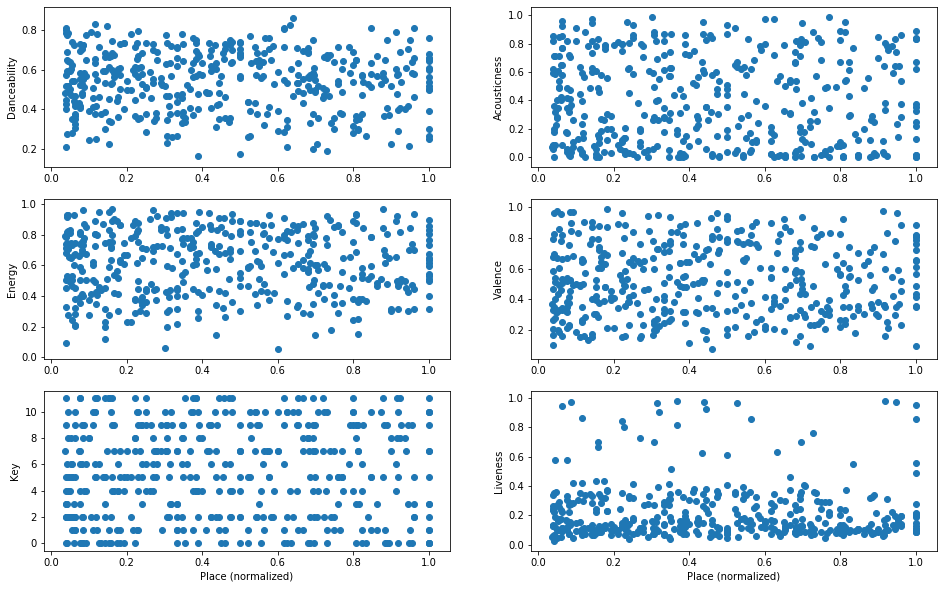

In [142]:
# We plotted all features against normalized place. None showed any sign of correlating with how well the songs placed.
# We can conclude that none of the features we looked at can explain a song's placement in the competition on their own. 
# The winning songs were a very diverse group that spanned the entire range for every feature analysed.

['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16,10))

ax[0,0].scatter("Normalized_place", "danceability", data=cleaned_data)
ax[0,0].set_ylabel("Danceability")

ax[1,0].scatter("Normalized_place", "energy", data=cleaned_data)
ax[1,0].set_ylabel("Energy")

ax[2,0].scatter("Normalized_place", "key", data=cleaned_data)
ax[2,0].set_ylabel("Key")
ax[2,0].set_xlabel("Place (normalized)")

#ax[3,0].scatter("Normalized_place", "loudness", data=cleaned_data)
#ax[3,0].set_ylabel("Loudness")

#ax[4,0].scatter("Normalized_place", "mode", data=cleaned_data)
#ax[4,0].set_ylabel("Mode")

#ax[5,0].scatter("Normalized_place", "speechiness", data=cleaned_data)
#ax[5,0].set_ylabel("Speechiness")
#ax[5,0].set_xlabel("Place (normalized)")

ax[0,1].scatter("Normalized_place", "acousticness", data=cleaned_data)
ax[0,1].set_ylabel("Acousticness")

ax[1,1].scatter("Normalized_place", "valence", data=cleaned_data)
ax[1,1].set_ylabel("Valence")

ax[2,1].scatter("Normalized_place", "liveness", data=cleaned_data)
ax[2,1].set_ylabel("Liveness")
ax[2,1].set_xlabel("Place (normalized)");

#ax[3,1].scatter("Normalized_place", "instrumentalness", data=cleaned_data)
#ax[3,1].set_ylabel("Valence")

#ax[4,1].scatter("Normalized_place", "tempo", data=cleaned_data)
#ax[4,1].set_ylabel("Tempo")
#ax[4,1].set_xlabel("Place (normalized)")

#ax[5,1].set_visible(0);

fig.savefig("data/Sample correlation plots.png")

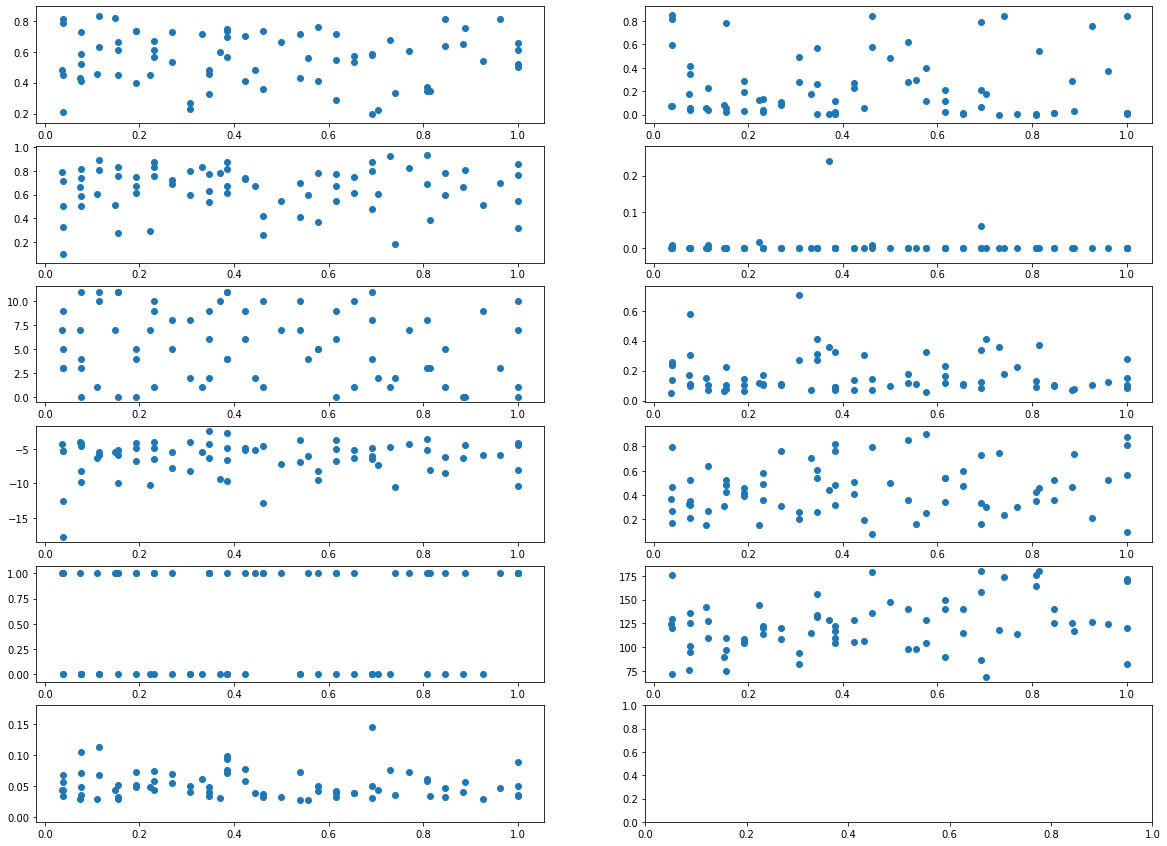

In [143]:
# We reasoned that taste in music changes over time, so maybe looking at the whole 60+ years of competition could be
# unreasonable. To address this, we looked at the data from only 5 years (2014-2019). However, the picture was 
# essentially the same.

['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(20,15))

ax[0,0].scatter("Normalized_place", "danceability", data=cleaned_data.loc[cleaned_data["Year"] > 2014, ])
ax[1,0].scatter("Normalized_place", "energy", data=cleaned_data.loc[cleaned_data["Year"] > 2014, ])
ax[2,0].scatter("Normalized_place", "key", data=cleaned_data.loc[cleaned_data["Year"] > 2014, ])
ax[3,0].scatter("Normalized_place", "loudness", data=cleaned_data.loc[cleaned_data["Year"] > 2014, ])
ax[4,0].scatter("Normalized_place", "mode", data=cleaned_data.loc[cleaned_data["Year"] > 2014, ])
ax[5,0].scatter("Normalized_place", "speechiness", data=cleaned_data.loc[cleaned_data["Year"] > 2014, ])
ax[0,1].scatter("Normalized_place", "acousticness", data=cleaned_data.loc[cleaned_data["Year"] > 2014, ])
ax[1,1].scatter("Normalized_place", "instrumentalness", data=cleaned_data.loc[cleaned_data["Year"] > 2014, ])
ax[2,1].scatter("Normalized_place", "liveness", data=cleaned_data.loc[cleaned_data["Year"] > 2014, ])
ax[3,1].scatter("Normalized_place", "valence", data=cleaned_data.loc[cleaned_data["Year"] > 2014, ])
ax[4,1].scatter("Normalized_place", "tempo", data=cleaned_data.loc[cleaned_data["Year"] > 2014, ]);

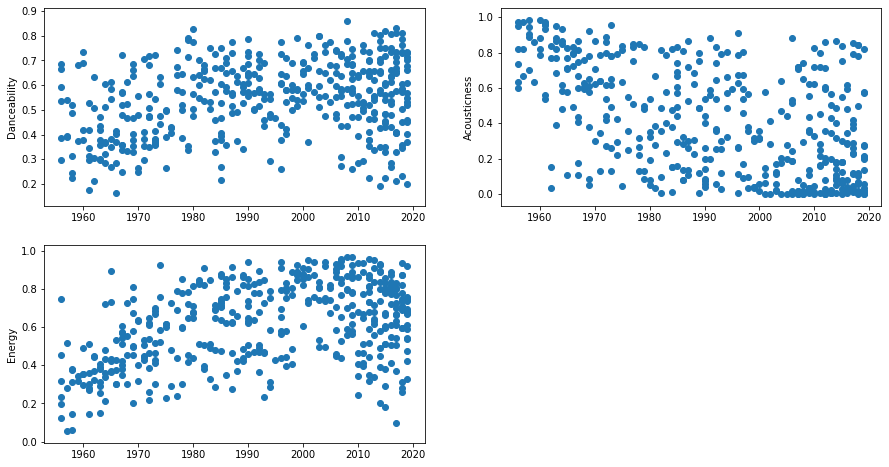

In [133]:
# Finally, we took a look at how the music features changed over time. (This was unrelated to our original question)
# We saw no correlation for most features, but found a *weak* correlation between time and three features (danceability, 
# energy and acousticness) between 1956 and 2000. There seems to have been a steady increase in danceability and energy
# (two features that we expect would go hand-in-hand) and a decrease in acousticness. It's important to note, however,
# that this is a weak correlation and there is a lot of variability in that time frame that cannot be explained by the 
# time.

['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,8))

ax[0,0].scatter("Year", "danceability", data=cleaned_data)
ax[0,0].set_ylabel("Danceability")

ax[1,0].scatter("Year", "energy", data=cleaned_data)
ax[1,0].set_ylabel("Energy")

#ax[2,0].scatter("Year", "key", data=cleaned_data)

#ax[3,0].scatter("Year", "loudness", data=cleaned_data)

#ax[4,0].scatter("Year", "mode", data=cleaned_data)

#ax[5,0].scatter("Year", "speechiness", data=cleaned_data)

ax[0,1].scatter("Year", "acousticness", data=cleaned_data)
ax[0,1].set_ylabel("Acousticness")

ax[1,1].set_visible(0)
#ax[1,1].scatter("Year", "instrumentalness", data=cleaned_data)

#ax[2,1].scatter("Year", "liveness", data=cleaned_data)

#ax[3,1].scatter("Year", "valence", data=cleaned_data)

#ax[4,1].scatter("Year", "tempo", data=cleaned_data)

In [107]:
cleaned_data["Year"][cleaned_data["Year"] < 2000].corr(cleaned_data["acousticness"][cleaned_data["Year"] < 2000])

-0.4580920990720533

In [108]:
cleaned_data["Year"][cleaned_data["Year"] < 2000].corr(cleaned_data["energy"][cleaned_data["Year"] < 2000])

0.5455453232169413

In [109]:
cleaned_data["Year"][cleaned_data["Year"] < 2000].corr(cleaned_data["danceability"][cleaned_data["Year"] < 2000])

0.38604200781648734

In [110]:
cleaned_data["Normalized_place"].corr(cleaned_data["danceability"])

-0.038105708665443855

In [136]:
import scipy

scipy.stats.pearsonr(cleaned_data["Year"][cleaned_data["Year"] < 2000], cleaned_data["acousticness"][cleaned_data["Year"] < 2000])

(-0.45809209907205317, 6.625073153318275e-14)

In [137]:
scipy.stats.pearsonr(cleaned_data["Year"][cleaned_data["Year"] < 2000], cleaned_data["danceability"][cleaned_data["Year"] < 2000])

(0.38604200781648734, 5.504964546634992e-10)

In [138]:
scipy.stats.pearsonr(cleaned_data["Year"][cleaned_data["Year"] < 2000], cleaned_data["energy"][cleaned_data["Year"] < 2000])

(0.5455453232169417, 4.332057307204504e-20)

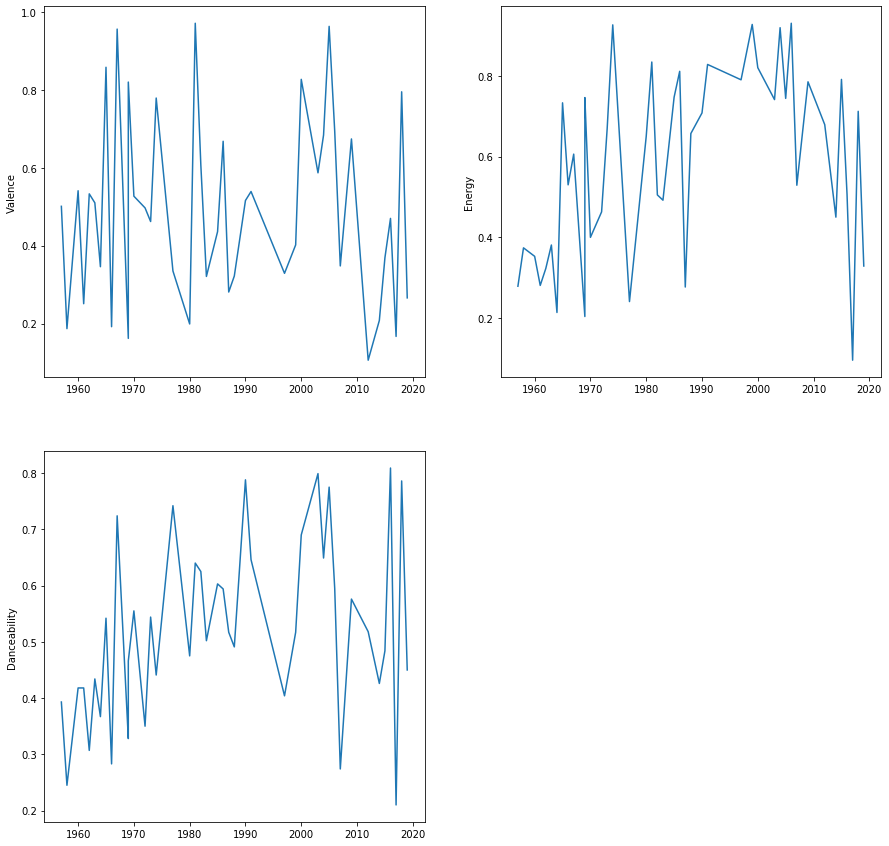

In [146]:
# We also looked specifically at the features of winning songs. Again, we found no correlation whatsoever, even for the 
# features that had a weak correlation with time.

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(15,15))
ax[0,0].plot("Year", "valence", data = cleaned_data.loc[cleaned_data["Place"]==1,])
ax[0,0].set_ylabel("Valence")
ax[0,1].plot("Year", "energy", data = cleaned_data.loc[cleaned_data["Place"]==1,])
ax[0,1].set_ylabel("Energy")
ax[1,0].plot("Year", "danceability", data = cleaned_data.loc[cleaned_data["Place"]==1,])
ax[1,0].set_ylabel("Danceability")

ax[1,1].set_visible(0);